In [1]:
#using Linear regression b/c a company is trying to decide to focus their efforts on their mobile app experience
#or their websites that the goal

In [3]:
#imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
#data
df = pd.read_csv('Ecommerce Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


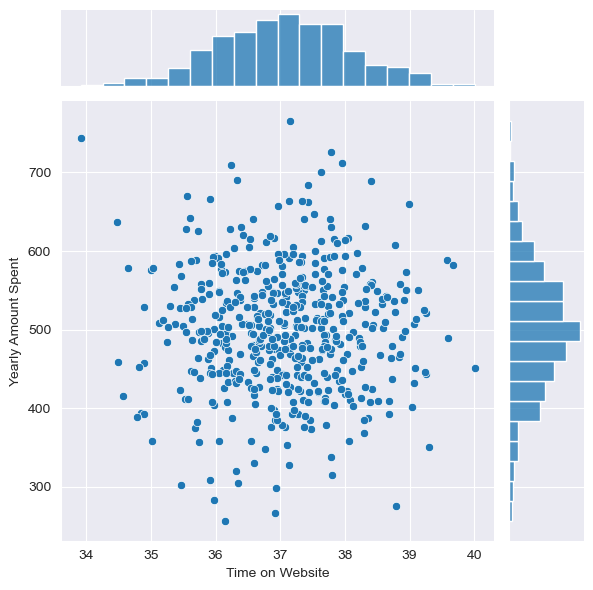

In [13]:
#using seabron to make a jointplot
sns.jointplot(x=df['Time on Website'], y=df['Yearly Amount Spent'])
#average time of the website is around 37 and Yearly amount of spending is 500 bucks

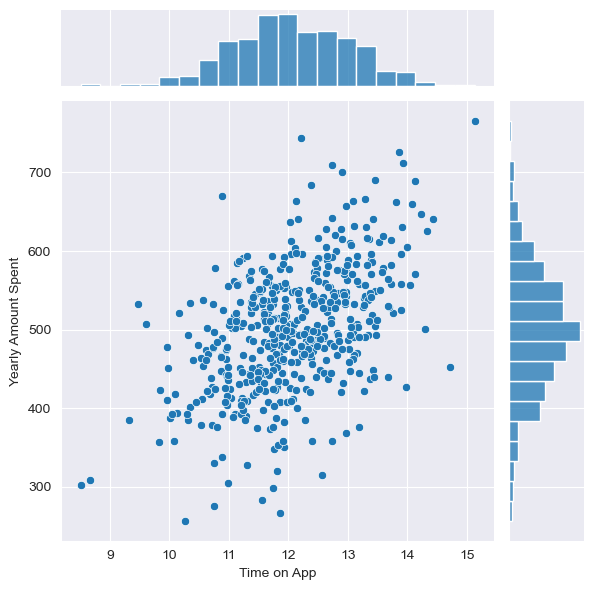

In [14]:
sns.jointplot(x=df['Time on App'], y=df['Yearly Amount Spent'])
# it seems like the retention span on the app compare of the website is a lot less
#but in the app creates a better reveneue

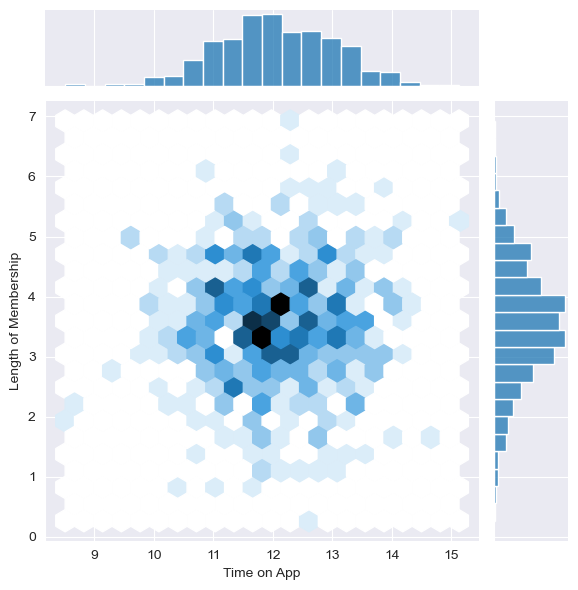

In [18]:
sns.jointplot(x=df['Time on App'], y=df['Length of Membership'], kind='hex')
# the distribution of teh length of app and the time on app

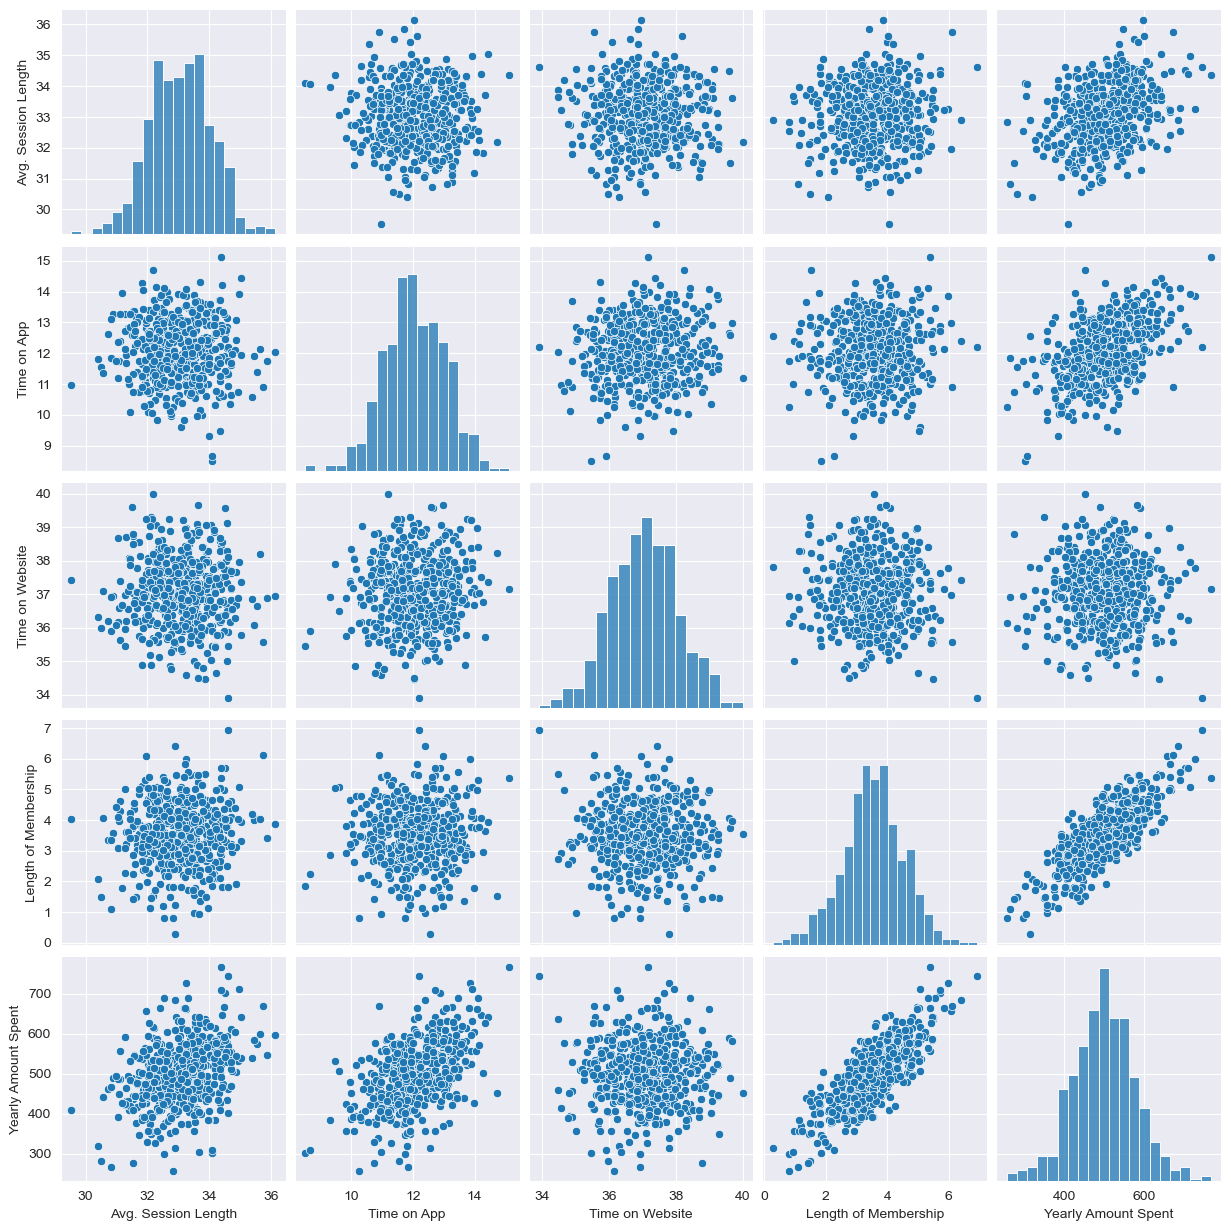

In [19]:
sns.pairplot(df)

In [20]:
# based on the pair plot the most correlated feature for yearly amount spent is 
# the length of the membership

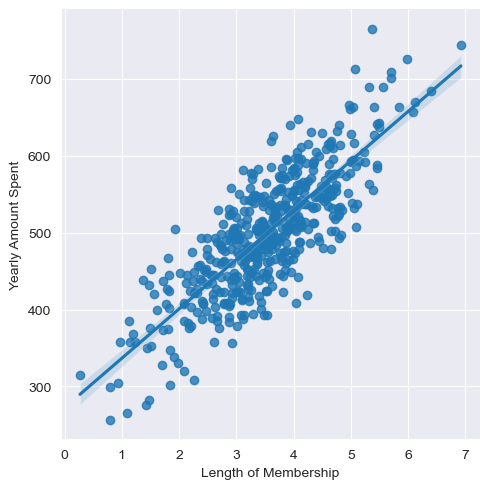

In [23]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

In [26]:
#Training and testing data time !!!!


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [25]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [58]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [59]:
y = df['Yearly Amount Spent']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
#the coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


In [65]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [66]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [67]:
predictions = lm.predict(X_test)

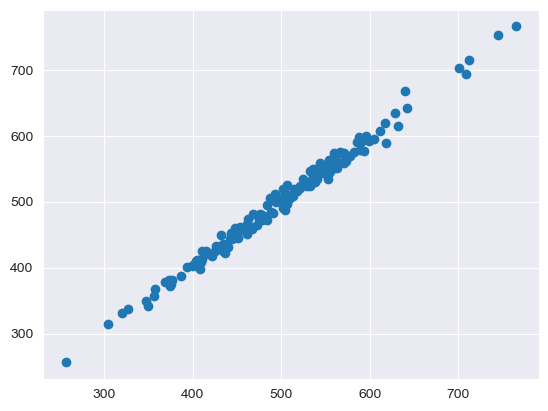

In [68]:
plt.scatter(y_test, predictions)

In [69]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

/var/folders/l5/r131f0_163sc57m30fj7cm4m0000gn/T/ipykernel_27650/3956035784.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),kde=True, bins=40)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

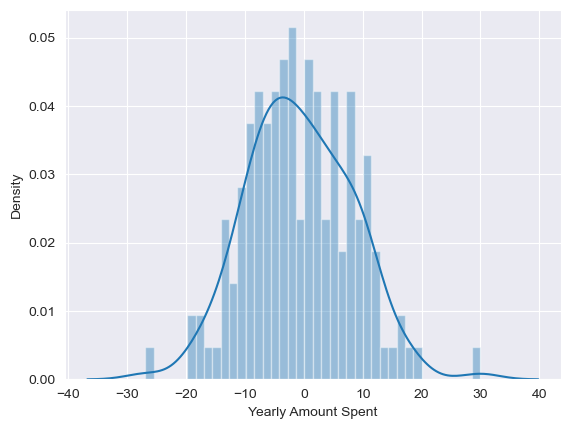

In [82]:
#the residiual
sns.distplot((y_test-predictions),kde=True, bins=40)

In [78]:
from sklearn import metrics

In [79]:
print(f'MAE {metrics.mean_absolute_error(y_test,predictions)} \nMSE: {metrics.mean_squared_error(y_test,predictions)} \nRMSE: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}')

MAE 7.228148653430815 
MSE: 79.81305165097409 
RMSE: 8.933815066978614


In [83]:
#Conclusion
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [84]:
#in a average increase of session length 25 dollars are more spent
#unit increase on time of the app increase of 38 dollar per year
#time on website is a increase of $0.19
#Length of Membershup increase by one unit it is a 61 dollar increase
#In Conclusion the website needs more work, or create a better experience of an app to increase the revenue 